# 🙅🏻Customer Personality 〽️Analysis & Segmentation
- dataset: marketing_campaign.csv

<b>ID</b>: 고객 고유 식별자  
<b>Year_Birth</b>: 고객의 출생연도  
<b>Education</b>: 고객의 교육 수준  
<b>Marital_Status</b>: 고객의 결혼 상태  
<b>Income</b>: 고객의 연간 가구 소득  
<b>Kidhome</b>: 고객 가구의 자녀 수  
<b>Teenhome</b>: 고객 가정의 청소년 수  
<b>Dt_Customer</b>: 고객이 회사에 등록한 날짜  
<b>Recency</b>: 고객이 마지막으로 구매한 후 일수  
<b>MntWines</b>: 지난 2년간 와인에 지출한 금액  
<b>MntFruits</b>: 지난 2년간 과일에 지출한 금액  
<b>MntMeatProducts</b>: 지난 2년간 육류 소비액  
<b>MnTFishProducts</b>: 지난 2년간 생선에 지출한 금액  
<b>MntSweetProducts</b>: 지난 2년간 과자에 지출한 금액  
<b>MntGoldProds</b>: 지난 2년간 금에 지출한 금액  
<b>NumDealsPurchases</b>: 할인된 가격으로 구매한 횟수  
<b>NumWebPurchases</b>: 회사 웹사이트를 통한 구매 건수  
<b>NumCatalogPurchases</b>: 카탈로그를 사용한 구매 건수  
<b>NumStorePurchases</b>: 매장에서 직접 구매한 횟수  
<b>NumWebVisitsMonth</b>: 지난 한 달 동안 회사 웹사이트를 방문한 횟수  
<b>AcceptedCmp1</b>: 고객이 첫 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0  
<b>AcceptedCmp2</b>: 고객이 두 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0  
<b>AcceptedCmp3</b>: 고객이 세 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0  
<b>AcceptedCmp4</b>: 고객이 4차 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0  
<b>AcceptedCmp5</b>: 5번째 캠페인에서 고객이 제안을 수락한 경우 1, 그렇지 않은 경우 0  
<b>Complain</b>: 지난 2년간 고객이 불만을 제기한 경우 1건, 그렇지 않은 경우 0건  
<b>Z_CostContact</b>:  
<b>Z_Revenue</b>:  
<b>Response</b>: 지난 캠페인에서 고객이 제안을 수락한 경우 1, 그렇지 않은 경우 0  


## Pre-processing

#### Load dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('./marketing_campaign.csv')
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0


In [4]:
pd.set_option('display.max_info_columns', 30)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

#### Change Dtype: Dt_Customer(object -> datetime)

In [5]:
df1 = df.copy()

In [6]:
df1['Dt_Customer'] # DD/MM/YYYY, object

0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2240, dtype: object

In [7]:
df1['Dt_Customer'] = pd.to_datetime(df1['Dt_Customer'], dayfirst=True) # YYYY//MM/DD, datetime
df1['Dt_Customer']

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

#### Check Null Value

In [8]:
df1.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
df1.shape

(2240, 29)

In [10]:
df1[df1['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


#### Drop NaN value in Income column

In [11]:
df2 = df1.copy()

In [12]:
df2 = df2.drop(df2[df2['Income'].isnull()].index)

In [13]:
df1.shape, df2.shape # drop 24 rows

((2240, 29), (2216, 29))

#### Check Data

In [14]:
df2.head(1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1


In [15]:
df2['Education'].value_counts() # Graduation: 대학 졸업, PhD: 박사 학위, Master: 석사 학위, 2n Cycle: 석사 학위(유럽), Basic: 고졸 이하

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [16]:
df2['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [17]:
df2['Kidhome'].value_counts() # children(자녀)

0    1283
1     887
2      46
Name: Kidhome, dtype: int64

In [18]:
df2['Teenhome'].value_counts() # Teenagers

0    1147
1    1018
2      51
Name: Teenhome, dtype: int64

#### Check duplicates

In [19]:
df2.duplicated().value_counts()

False    2216
dtype: int64

## Data cleansing: Handle Outlier 

#### Identify Outlier

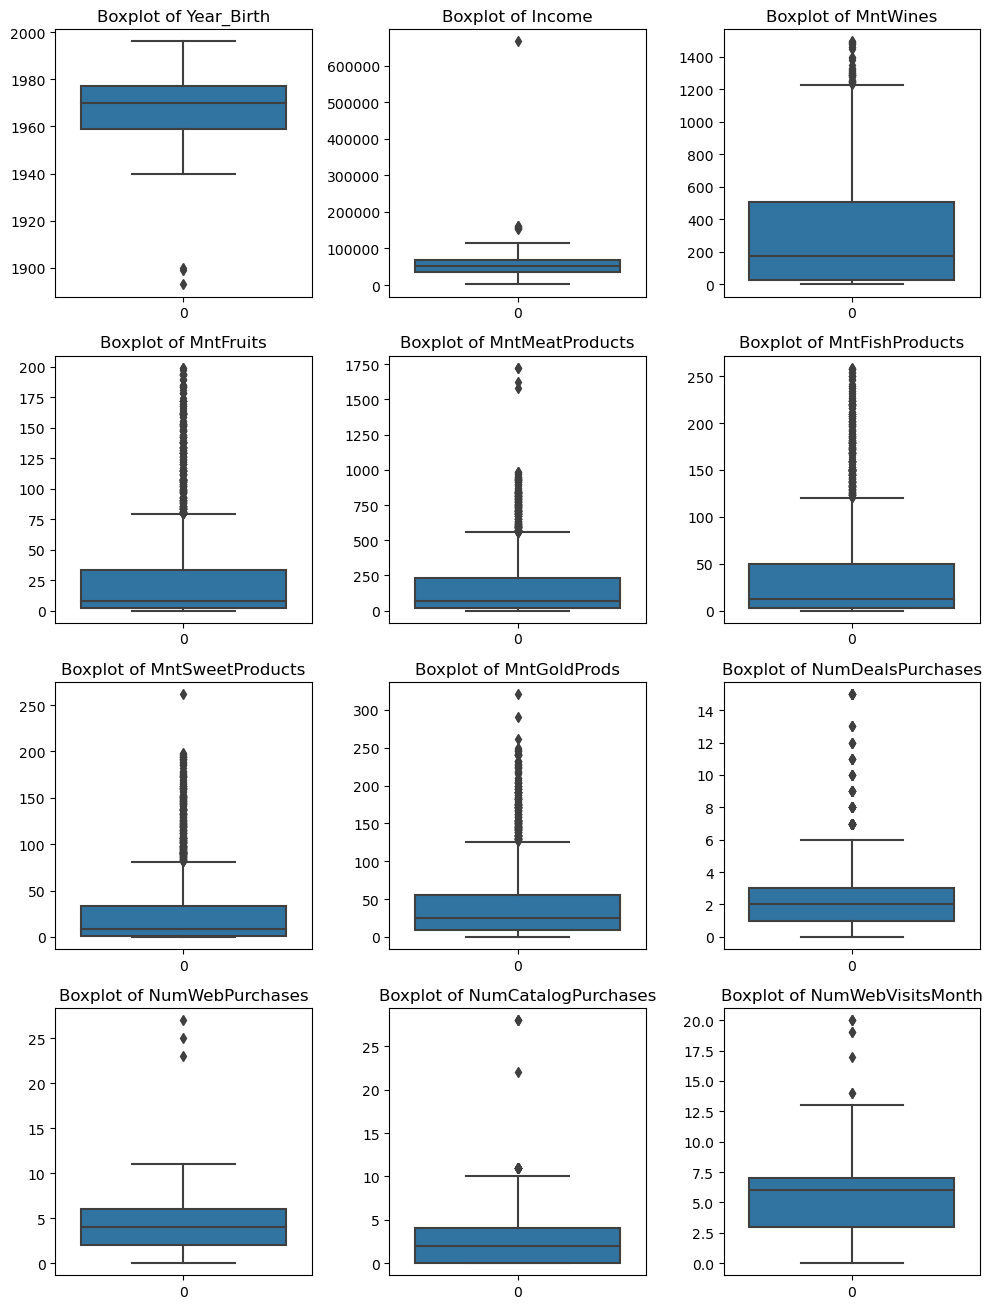

In [20]:
# 확인할 열 목록
columns = [
    'Year_Birth', 'Income', 'MntWines', 'MntFruits',
    'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
    'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
    'NumCatalogPurchases', 'NumWebVisitsMonth'
]

# 서브플롯 생성 (열의 수에 맞춰 조정)
num_columns = len(columns)
num_rows = (num_columns // 3) + (num_columns % 3 > 0)  # 3열로 배치

fig, axs = plt.subplots(num_rows, 3, figsize=(10, num_rows * 3.3)) # figsize=(15, num_rows * 5)

# 각 열에 대해 boxplot 그리기
for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    sns.boxplot(df2[column], ax=axs[row, col])
    axs[row, col].set_title(f'Boxplot of {column}')

# 빈 서브플롯 숨기기 (필요할 경우)
for j in range(i + 1, num_rows * 3):
    fig.delaxes(axs.flatten()[j])

# 레이아웃 조정 및 출력
plt.tight_layout()
plt.show()


##### 1) Remove Outliers - Year_Birth

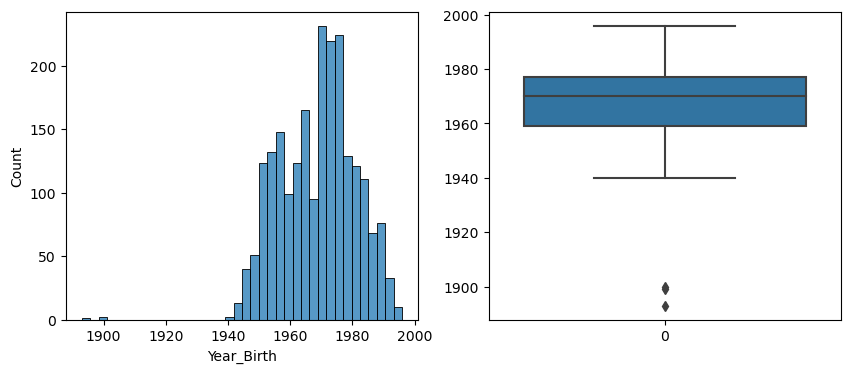

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))
sns.histplot(df2['Year_Birth'], ax=axs[0])
sns.boxplot(df2['Year_Birth'], ax=axs[1])
plt.show()

#### IQR method

In [22]:
def detect_outliers_iqr(df, column):
    """
    Returns:
    - outliers: 이상치
    - clean_data (pd.DataFrame): 이상치가 제거된 데이터프레임
    """
    Q1 = df[column].quantile(0.25)  # 1사분위수
    Q3 = df[column].quantile(0.75)  # 3사분위수
    IQR = Q3 - Q1  # IQR 계산
    
    lower_bound = Q1 - 1.5 * IQR  # 하한값
    upper_bound = Q3 + 1.5 * IQR  # 상한값
    
    # 이상치 필터링
    outliers = df[column][(df[column] < lower_bound) | (df[column] > upper_bound)]
    clean_data = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return outliers, clean_data

192    1900
239    1893
339    1899
Name: Year_Birth, dtype: int64


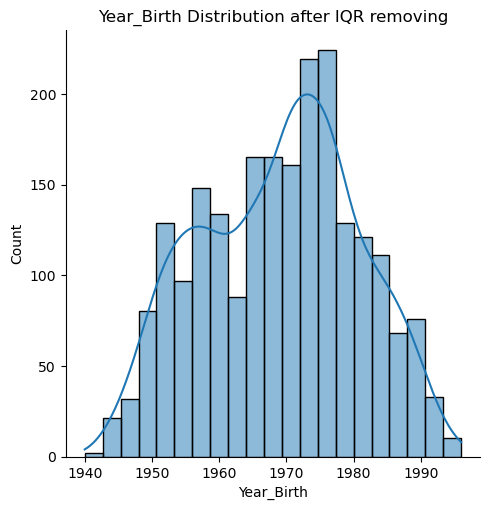

In [23]:
outliers, clean_df = detect_outliers_iqr(df2, 'Year_Birth') # 1900년 이하 3개 발견
print(outliers)
sns.displot(clean_df['Year_Birth'], kde=True)
plt.title('Year_Birth Distribution after IQR removing')
plt.show()

#### Z-Score method

In [24]:
from scipy import stats

def detect_outliers_zscore(df, column, threshold=3):
    z_scores = stats.zscore(df[column])  # Z-Score 계산
    abs_z_scores = np.abs(z_scores)  # 절대값 처리
    
    # 이상치 필터링
    outliers = df[column][abs_z_scores > threshold]
    clean_data = df[abs_z_scores <= threshold]
    
    return outliers, clean_data

192    1900
239    1893
339    1899
Name: Year_Birth, dtype: int64


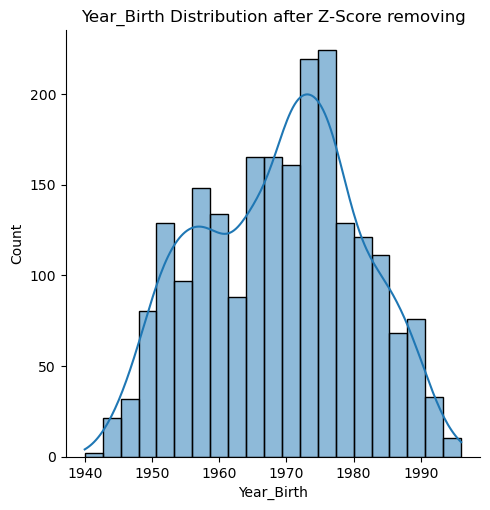

In [25]:
outliers, clean_df = detect_outliers_zscore(df2, 'Year_Birth')
print(outliers)
sns.displot(clean_df['Year_Birth'], kde=True)
plt.title('Year_Birth Distribution after Z-Score removing')
plt.show()

##### 2) Remove Outliers - Income

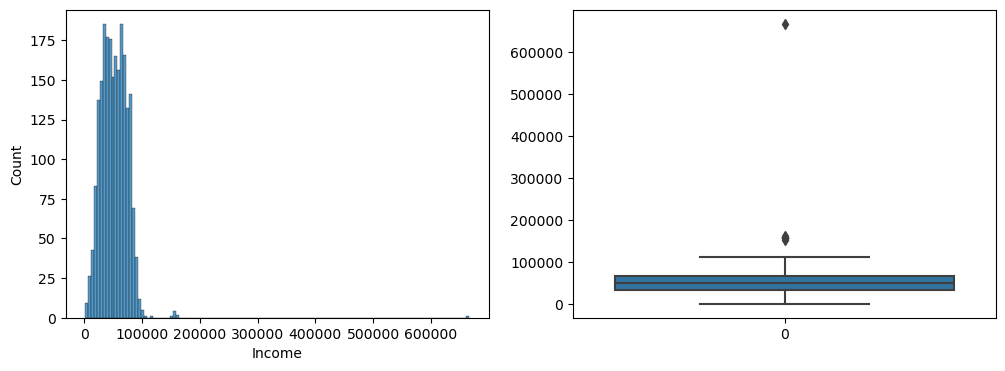

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))
sns.histplot(df2['Income'], ax=axs[0])
sns.boxplot(df2['Income'], ax=axs[1])
plt.show()

164     157243.0
617     162397.0
655     153924.0
687     160803.0
1300    157733.0
1653    157146.0
2132    156924.0
2233    666666.0
Name: Income, dtype: float64


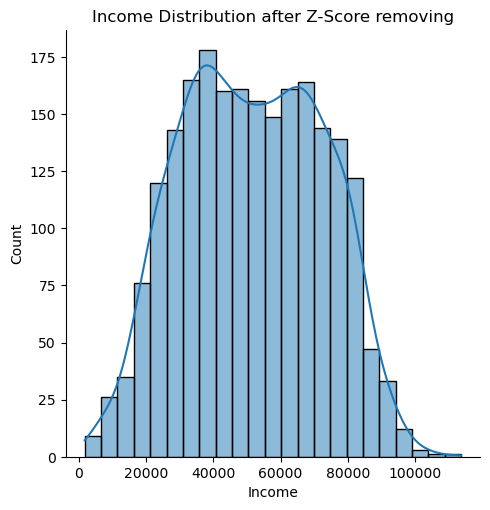

In [27]:
outliers, clean_df = detect_outliers_zscore(clean_df, 'Income') # 150,000 이상인 data 8개 발견
print(outliers)
sns.displot(clean_df['Income'], kde=True)
plt.title('Income Distribution after Z-Score removing')
plt.show()

# Feature Engineering

## Add Churned column

In [28]:
fe_df = clean_df.copy()

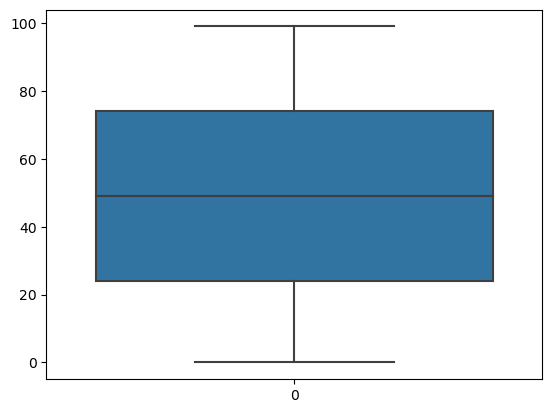

In [29]:
sns.boxplot(fe_df['Recency'])
plt.show()

In [30]:
fe_df['Churned'] = (fe_df['Recency'] >= 75).astype(int) # 전체: 2205, 75 이상: 537, 90 이상: 213
fe_df[['Recency', 'Churned']]

,Recency,Churned
0,58,0
1,38,0
2,26,0
3,26,0
4,94,1
...,...,...
2235,46,0
2236,56,0
2237,91,1
2238,8,0


## Add Income Level column

In [31]:
income_bins = pd.cut(fe_df['Income'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

fe_df['Income_Bins'] = income_bins

In [32]:
fe_df[['Income','Income_Bins']]

,Income,Income_Bins
0,58138.0,Medium
1,46344.0,Low
2,71613.0,High
3,26646.0,Low
4,58293.0,Medium
...,...,...
2235,61223.0,Medium
2236,64014.0,Medium
2237,56981.0,Medium
2238,69245.0,High


## Add Months Enrolled & Web Purchase Conversion Rate columns

In [33]:
## 가입 개월 수 = (데이터셋 올라온 날짜 - 매장에 등록한 날짜)//30
fe_df['Months_Enrolled'] = (pd.to_datetime('2024-12-01') - clean_df['Dt_Customer']).dt.days // 30
fe_df['Months_Enrolled']

0       149
1       130
2       137
3       131
4       132
       ... 
2235    139
2236    127
2237    132
2238    132
2239    147
Name: Months_Enrolled, Length: 2205, dtype: int64

In [34]:
# 웹 구매 전환율 = 총 웹 구매 수 / 총 웹 방문 수
# 총 웹 방문 수 = 한달 웹 방문 수 * 가입 개월 수
fe_df['Web_Purchase_Conversion_Rate'] = fe_df['NumWebPurchases'] / (fe_df['NumWebVisitsMonth'] * fe_df['Months_Enrolled'])

In [35]:
fe_df['Web_Purchase_Conversion_Rate'].replace([float('inf'), -float('inf')], 0, inplace=True)
fe_df['Web_Purchase_Conversion_Rate'].fillna(0, inplace=True)

fe_df['Web_Purchase_Conversion_Rate']

0       0.007670
1       0.001538
2       0.014599
3       0.002545
4       0.007576
          ...   
2235    0.012950
2236    0.008999
2237    0.002525
2238    0.015152
2239    0.002915
Name: Web_Purchase_Conversion_Rate, Length: 2205, dtype: float64

In [36]:
fe_df[['NumWebPurchases','NumWebVisitsMonth','Months_Enrolled','Web_Purchase_Conversion_Rate']]


,NumWebPurchases,NumWebVisitsMonth,Months_Enrolled,Web_Purchase_Conversion_Rate
0,8,7,149,0.007670
1,1,5,130,0.001538
2,8,4,137,0.014599
3,2,6,131,0.002545
4,5,5,132,0.007576
...,...,...,...,...
2235,9,5,139,0.012950
2236,8,7,127,0.008999
2237,2,6,132,0.002525
2238,6,3,132,0.015152


## Add Total Spending column

In [37]:
product = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
fe_df['Total_Spending'] = fe_df[product].sum(axis=1)

In [38]:
fe_df[['Total_Spending', 'Income_Bins']]

,Total_Spending,Income_Bins
0,1617,Medium
1,27,Low
2,776,High
3,53,Low
4,422,Medium
...,...,...
2235,1341,Medium
2236,444,Medium
2237,1241,Medium
2238,843,High


# EDA

## 1. Churn Customer Analysis

Complained and Churned: 0.23%
Complained and Not Churned: 0.68%
Not Complained and Churned: 24.13%
Not Complained and Not Churned: 74.97%


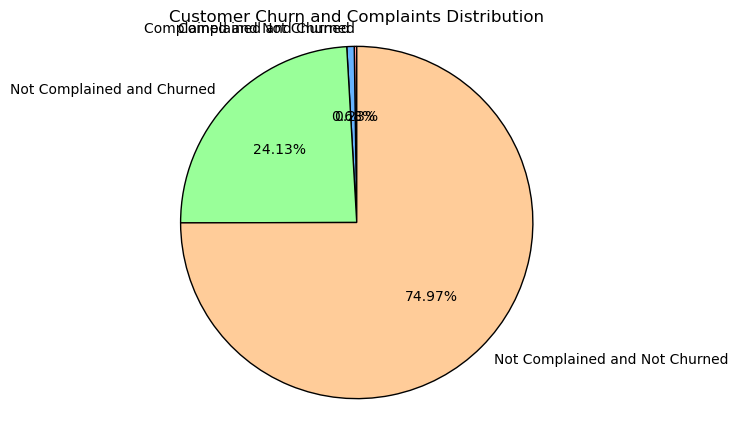

In [39]:
complained_and_churned = fe_df[(fe_df['Complain'] == 1) & (fe_df['Churned'] == 1)]
complained_and_not_churned = fe_df[(fe_df['Complain'] == 1) & (fe_df['Churned'] == 0)]
not_complained_and_churned = fe_df[(clean_df['Complain'] == 0) & (fe_df['Churned'] == 1)]
not_complained_and_not_churned = fe_df[(clean_df['Complain'] == 0) & (fe_df['Churned'] == 0)]

total_customers = len(fe_df)  # 전체 고객 수

probabilities = {
    'Complained and Churned': len(complained_and_churned) / total_customers * 100,
    'Complained and Not Churned': len(complained_and_not_churned) / total_customers * 100,
    'Not Complained and Churned': len(not_complained_and_churned) / total_customers * 100,
    'Not Complained and Not Churned': len(not_complained_and_not_churned) / total_customers * 100
}

for key, value in probabilities.items():
    print(f"{key}: {round(value,2)}%")

# Data for pie chart
labels = list(probabilities.keys())  # 라벨
sizes = list(probabilities.values())  # 값 (비율)

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'], wedgeprops={'edgecolor': 'black'})

# 차트를 원형으로 표시
plt.axis('equal')
plt.title('Customer Churn and Complaints Distribution')
plt.show()

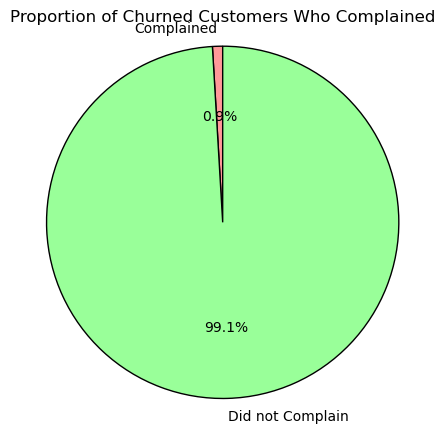

In [40]:
labels =  ['Complained', 'Did not Complain']
sizes = [len(complained_and_churned), len(not_complained_and_churned)]

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#99ff99'], wedgeprops={'edgecolor': 'black'})
plt.title('Proportion of Churned Customers Who Complained')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle
plt.show()

avg_consumption:
MntWines            297.139665
MntMeatProducts     169.599628
MntFishProducts      36.869646
MntSweetProducts     27.945996
MntGoldProds         42.767225
MntFruits            26.273743
dtype: float64


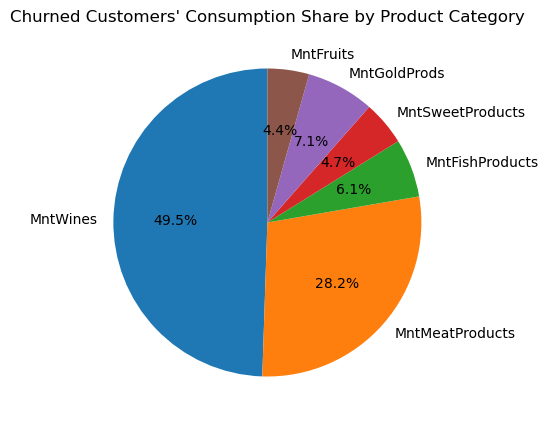

In [41]:
# 1. 이탈 고객 필터링
churned_customers = fe_df[fe_df['Churned']==1]

# 2. 소비 패턴 관련 컬럼 선택
product = ['MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'MntFruits']
churned_consumption = churned_customers[product]

# 3. 각 제품군별 평균 소비 금액 계산
avg_consumption = churned_consumption.mean()
print(f"avg_consumption:\n{avg_consumption}")

# 4. 시각화 - 파이 차트
plt.figure(figsize=(5, 5))
plt.pie(avg_consumption.values, labels=avg_consumption.index, autopct='%1.1f%%', startangle=90)
plt.title('Churned Customers\' Consumption Share by Product Category')
plt.show()

## 2. Spending Analysis

#### Number of Customers by Income Level

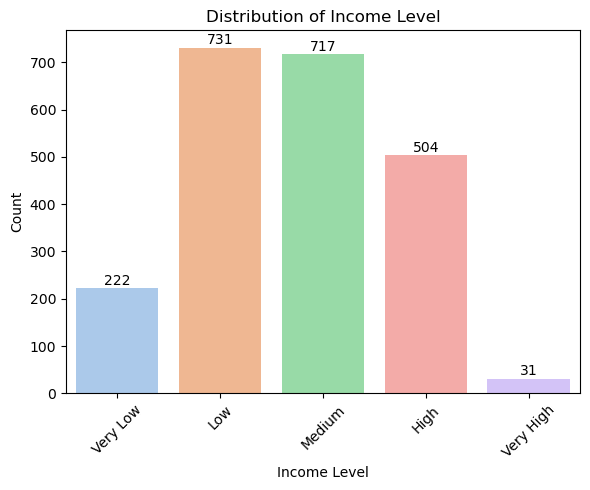

In [42]:
# Income_Bins의 빈도수를 계산하고 시각화
income_bin_counts = fe_df['Income_Bins'].value_counts().reset_index()

# 막대 그래프 생성
plt.figure(figsize=(6, 5))
ax = sns.barplot(x='index', y='Income_Bins', data=income_bin_counts, palette='pastel')
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.title('Distribution of Income Level')
plt.xticks(rotation=45)

# 막대 위에 값 추가
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 1, f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


#### Check Wine Spending

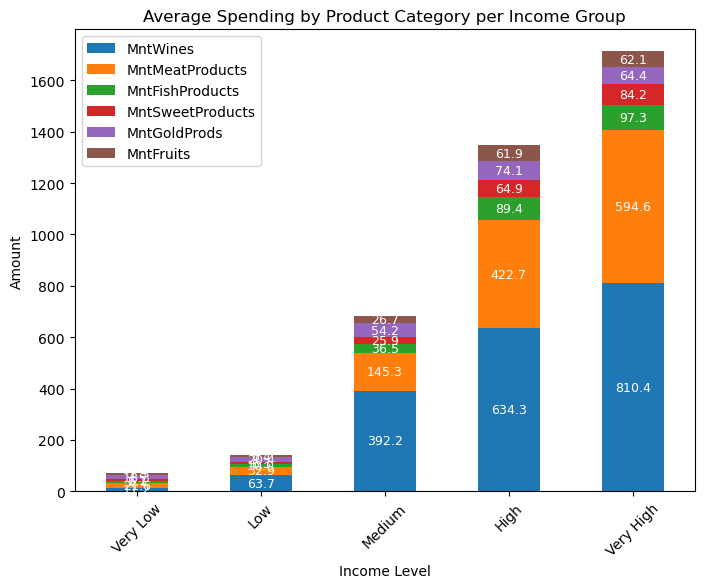

In [43]:
grouped_data = fe_df.groupby('Income_Bins').mean(numeric_only=True)[product]

# 스택형 막대 그래프 생성
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Average Spending by Product Category per Income Group')
plt.xlabel('Income Level')
plt.xticks(rotation=45)
plt.ylabel('Amount')

# 그래프 내부에 라벨 추가
for i in range(len(grouped_data)):
    cumulative_height = 0
    for column in grouped_data.columns:
        height = grouped_data[column].iloc[i]
        ax.text(i, cumulative_height + height / 2, f'{height:.1f}', ha='center', va='center', color='white', fontsize=9)
        cumulative_height += height

plt.show()

#### Average Number of Deals Purchases

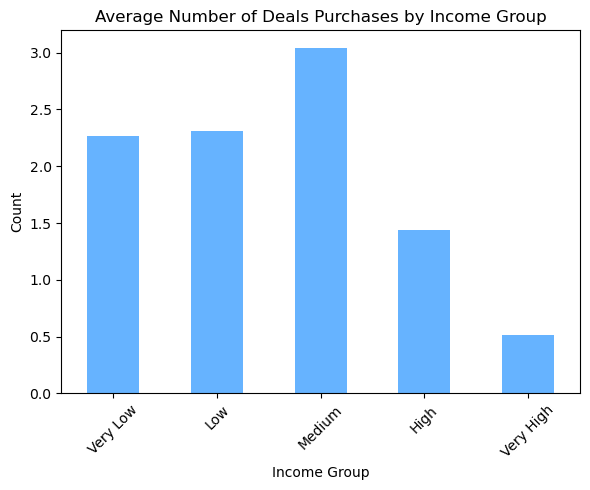

In [44]:
# 소득 수준별로 NumDealsPurchases(할인 구매 횟수)의 평균 값 계산
income_deals_avg = fe_df.groupby('Income_Bins')['NumDealsPurchases'].mean()

# 막대 그래프 생성
plt.figure(figsize=(6, 5))
income_deals_avg.plot(kind='bar', color='#66b3ff')
plt.title('Average Number of Deals Purchases by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Average Total Consumption

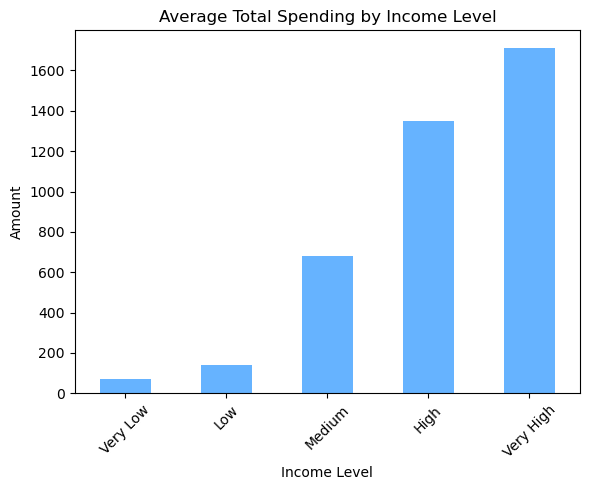

In [45]:
# Calculate the average total consumption for each income bin
avg_spending_by_income = fe_df.groupby(income_bins)['Total_Spending'].mean()

# Plot the average total spending by income level
plt.figure(figsize=(6, 5))
avg_spending_by_income.plot(kind='bar', color='#66b3ff')
plt.title('Average Total Spending by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Final Graph

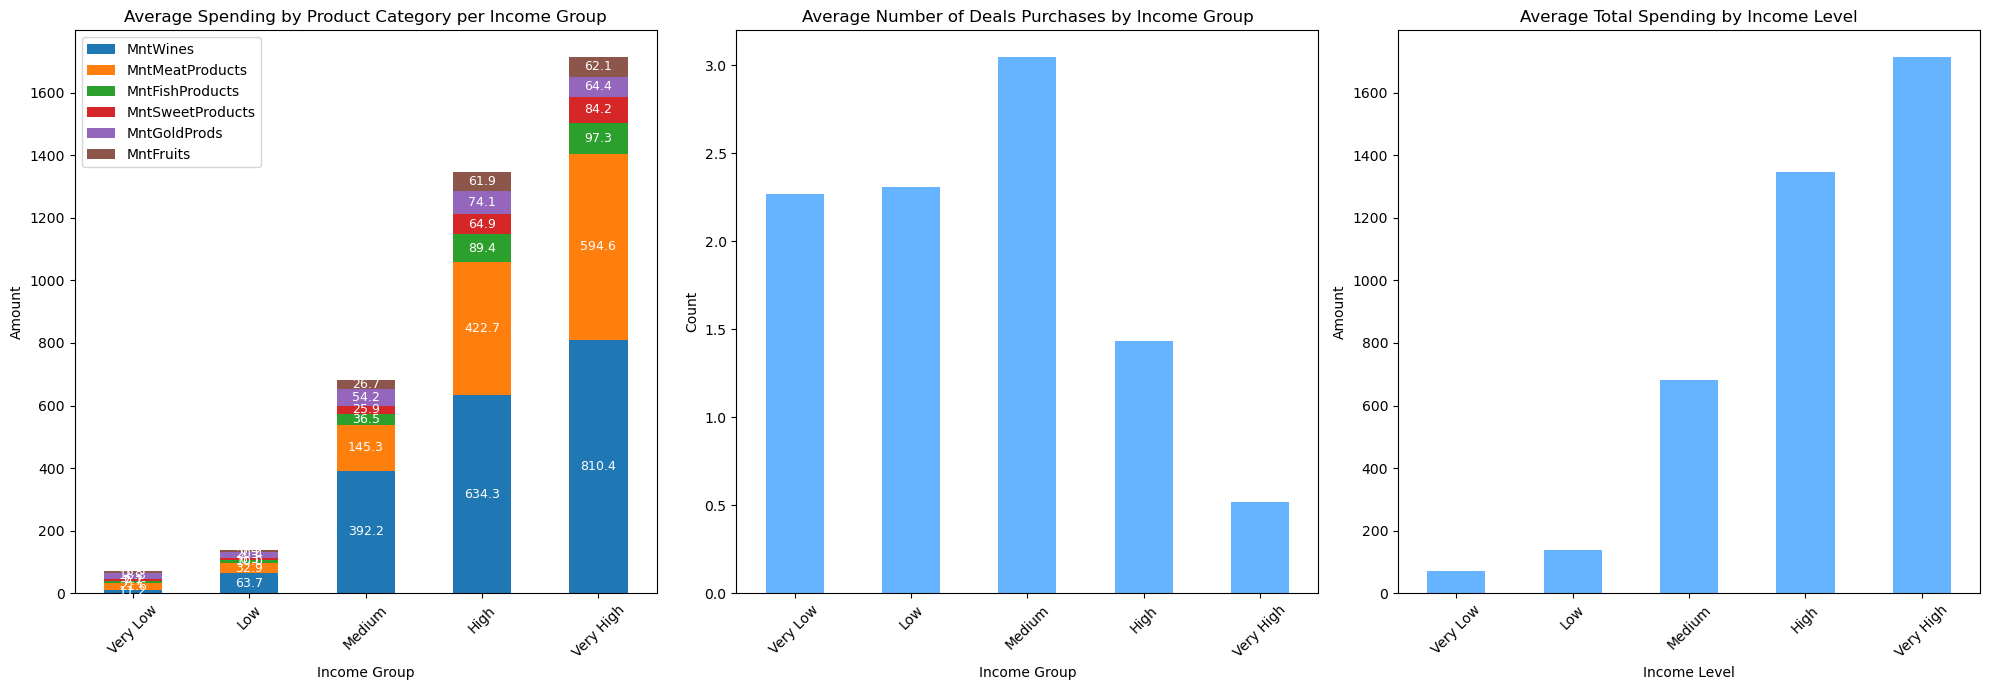

In [46]:
fig, axs = plt.subplots(1, 3, figsize=(20, 7))

# 1번째 서브플롯: 스택형 막대 그래프
grouped_data = fe_df.groupby('Income_Bins').mean(numeric_only=True)[product]
grouped_data.plot(kind='bar', stacked=True, ax=axs[0])
axs[0].set_title('Average Spending by Product Category per Income Group')
axs[0].set_xlabel('Income Group')
axs[0].set_ylabel('Amount')
axs[0].tick_params(axis='x', rotation=45)

# 그래프 내부에 라벨 추가
for i in range(len(grouped_data)):
    cumulative_height = 0
    for column in grouped_data.columns:
        height = grouped_data[column].iloc[i]
        axs[0].text(i, cumulative_height + height / 2, f'{height:.1f}', ha='center', va='center', color='white', fontsize=9)
        cumulative_height += height

# 2번째 서브플롯: 소득 수준별 NumDealsPurchases(할인 구매 횟수) 평균 값 계산
income_deals_avg = fe_df.groupby('Income_Bins')['NumDealsPurchases'].mean()
income_deals_avg.plot(kind='bar', color='#66b3ff', ax=axs[1])
axs[1].set_title('Average Number of Deals Purchases by Income Group')
axs[1].set_xlabel('Income Group')
axs[1].set_ylabel('Count')
axs[1].tick_params(axis='x', rotation=45)

# 3번째 서브플롯: 소득 수준별 총 소비 평균 값 계산
avg_spending_by_income = fe_df.groupby(income_bins)['Total_Spending'].mean()
avg_spending_by_income.plot(kind='bar', color='#66b3ff', ax=axs[2])
axs[2].set_title('Average Total Spending by Income Level')
axs[2].set_xlabel('Income Level')
axs[2].set_ylabel('Amount')
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## 3. On/Offline sales analysis

#### Average purchases per channel

Total Customer Number: 2205
Web Purchases Number: 2163
Catalog Purchases Number: 1634
Store Purchases Number: 2195


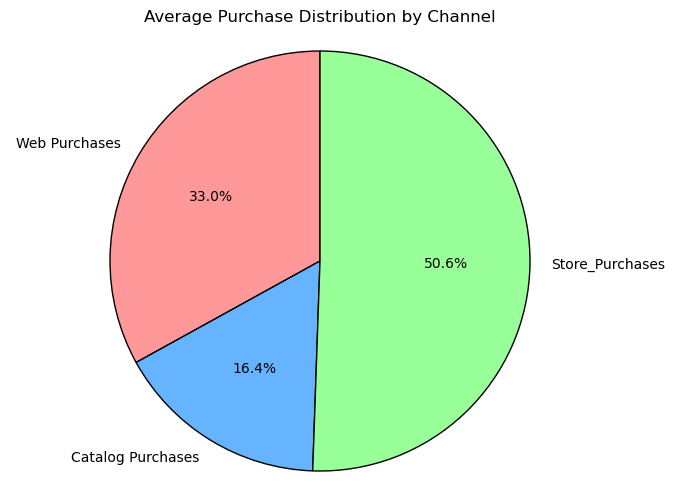

In [47]:
print(f"Total Customer Number: {len(fe_df)}")
print(f"Web Purchases Number: {len(fe_df[fe_df['NumWebPurchases']!=0])}")
print(f"Catalog Purchases Number: {len(fe_df[fe_df['NumCatalogPurchases']!=0])}")
print(f"Store Purchases Number: {len(fe_df[fe_df['NumStorePurchases']!=0])}")

# 총 구매 수 계산
total_purchases = fe_df['NumWebPurchases'] + fe_df['NumCatalogPurchases'] + fe_df['NumStorePurchases']

# 각 채널의 구매 비율 계산 후 평균 구하기
web_purchase_percent_avg = (fe_df['NumWebPurchases'] / total_purchases).mean() * 100
catalog_purchase_percent_avg = (fe_df['NumCatalogPurchases'] / total_purchases).mean() * 100
store_purchase_percent_avg = (fe_df['NumStorePurchases'] / total_purchases).mean() * 100

# 평균값을 딕셔너리로 저장
purchase_channel_avg = {
    'Web Purchases': web_purchase_percent_avg,
    'Catalog Purchases': catalog_purchase_percent_avg,
    'Store_Purchases': store_purchase_percent_avg
}

sizes = list(purchase_channel_avg.values())
labels = list(purchase_channel_avg.keys())

# Create a pie chart to show the distribution of purchases across channels
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'], wedgeprops={'edgecolor': 'black'})
plt.title('Average Purchase Distribution by Channel')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### Web Purchase Conversion Rate

count    2205.000000
mean        0.007872
std         0.009118
min         0.000000
25%         0.002364
50%         0.005594
75%         0.011261
max         0.210938
Name: Web_Purchase_Conversion_Rate, dtype: float64


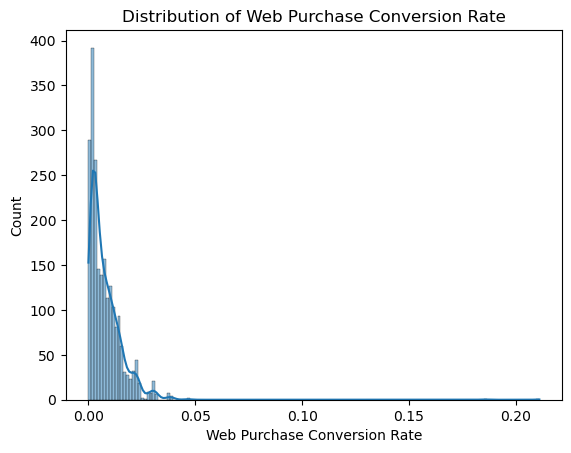

In [48]:
print(fe_df['Web_Purchase_Conversion_Rate'].describe())

sns.histplot(fe_df['Web_Purchase_Conversion_Rate'], kde=True)
plt.title('Distribution of Web Purchase Conversion Rate')
plt.xlabel('Web Purchase Conversion Rate')
plt.ylabel('Count')
plt.show()